In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("fraudTrain.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290885 entries, 0 to 290884
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             290885 non-null  int64  
 1   trans_date_trans_time  290885 non-null  object 
 2   cc_num                 290885 non-null  int64  
 3   merchant               290885 non-null  object 
 4   category               290885 non-null  object 
 5   amt                    290885 non-null  float64
 6   first                  290885 non-null  object 
 7   last                   290885 non-null  object 
 8   gender                 290885 non-null  object 
 9   street                 290885 non-null  object 
 10  city                   290885 non-null  object 
 11  state                  290885 non-null  object 
 12  zip                    290885 non-null  int64  
 13  lat                    290885 non-null  float64
 14  long                   290885 non-nu

In [4]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,290885.000000,2.908850e+05,290885.000000,290885.000000,290885.000000,290885.000000,2.908850e+05,2.908840e+05,290884.000000,290884.000000,290884.000000
mean,145442.000000,4.165208e+17,70.965352,48775.353975,38.535933,-90.211681,8.970749e+04,1.331976e+09,38.535983,-90.211830,0.007570
std,83971.410864,1.307773e+18,157.537071,26904.375271,5.078213,13.768078,3.040308e+05,3.503132e+06,5.112832,13.780261,0.086676
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,1.200000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,72721.000000,1.800365e+14,9.650000,26041.000000,34.620500,-96.798000,7.430000e+02,1.329042e+09,34.732847,-96.880752,0.000000
50%,145442.000000,3.519607e+15,47.670000,48174.000000,39.354300,-87.461600,2.456000e+03,1.332166e+09,39.352841,-87.421542,0.000000
75%,218163.000000,4.642255e+15,83.430000,72011.000000,41.894800,-80.138100,2.047800e+04,1.334984e+09,41.955614,-80.208766,0.000000
max,290884.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.337769e+09,67.510267,-66.956540,1.000000


In [5]:
train_data.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [6]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

**PREPROCESSING**

In [7]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data['dob'] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290880,290880,2019-05-23 10:20:40,373905417449658,fraud_Mraz-Herzog,gas_transport,70.69,Sarah,Bishop,F,554 Mcdonald Valley Apt. 539,...,31.9290,-97.6443,2526,Phytotherapist,1970-11-12,d098fe66cf031188f0a0b026c5d9974a,1.337768e+09,32.477608,-96.872565,0.0
290881,290881,2019-05-23 10:21:02,2318062975163331,"fraud_Reichert, Shanahan and Hayes",shopping_net,22.42,William,Martinez,M,0207 Griffith Plains Apt. 544,...,39.4336,-91.0664,4593,"Teacher, early years/pre",1940-11-11,14c59225849ba1fdf6f703082bb2ca6a,1.337768e+09,39.950346,-91.468587,0.0
290882,290882,2019-05-23 10:23:48,676195318214,"fraud_Swaniawski, Bahringer and Ledner",grocery_net,24.44,Brandy,Quinn,F,9734 Beard Fields Suite 885,...,29.6047,-96.5249,106,"Editor, film/video",1983-07-24,a19c9037fe5bd7a39f2d961fbe3a2976,1.337769e+09,29.069159,-97.141377,0.0
290883,290883,2019-05-23 10:24:44,3521417320836166,"fraud_Kohler, Lindgren and Koelpin",grocery_net,33.99,Angela,Hodges,F,08236 Kim Hill,...,39.8490,-86.2720,910148,Firefighter,1975-11-30,aa66da744e6f421117c5dc05511d0b5b,1.337769e+09,40.823105,-86.794032,0.0


In [21]:
train_data.drop(columns=['Unnamed: 0','cc_num','first','last','street','city','state','zip','dob','trans_num','trans_date_trans_time'],inplace=True)
train_data

KeyError: "['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'trans_date_trans_time'] not found in axis"

In [25]:
#Drop all rows contain missing value
train_data = train_data.dropna(ignore_index=True)

In [26]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data['category'] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data['job'] = encoder.fit_transform(train_data['job'])


/tmp/ipython-input-340447860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
/tmp/ipython-input-340447860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['category'] = encoder.fit_transform(train_data["category"])
/tmp/ipython-input-340447860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [27]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,360,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149,416,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154,298,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939,319,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99,113,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
290879,488,2,79.50,0,31.9571,-98.9656,1791,108,1.337768e+09,32.431354,-99.734842,0.0
290880,444,2,70.69,0,31.9290,-97.6443,2526,330,1.337768e+09,32.477608,-96.872565,0.0
290881,504,11,22.42,1,39.4336,-91.0664,4593,438,1.337768e+09,39.950346,-91.468587,0.0
290882,609,3,24.44,0,29.6047,-96.5249,106,137,1.337769e+09,29.069159,-97.141377,0.0


**EXPLORITY DATA ANALYSIS**

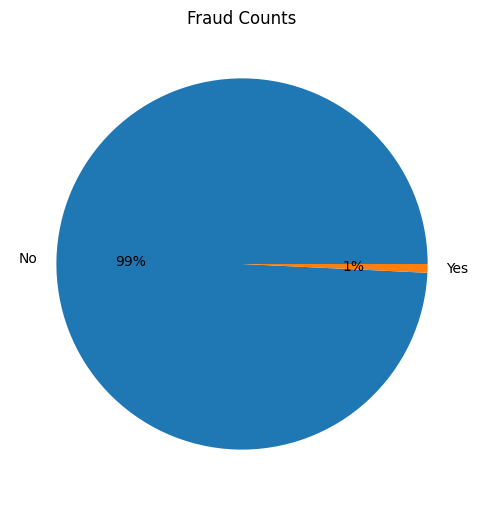

In [28]:
counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(counts, labels=["No", "Yes"], autopct="%.0f%%")
plt.title("Fraud Counts")
plt.tight_layout() #automatically adjust subplot parameters
plt.show()


**MODEL TRAIN**

In [29]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
y = train_data["is_fraud"]

In [30]:
X

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,514,8,4.97,0,36.0788,-81.1781,3495,360,1.325376e+09,36.011293,-82.048315
1,241,4,107.23,0,48.8878,-118.2105,149,416,1.325376e+09,49.159047,-118.186462
2,390,0,220.11,1,42.1808,-112.2620,4154,298,1.325376e+09,43.150704,-112.154481
3,360,2,45.00,1,46.2306,-112.1138,1939,319,1.325376e+09,47.034331,-112.561071
4,297,9,41.96,1,38.4207,-79.4629,99,113,1.325376e+09,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
290879,488,2,79.50,0,31.9571,-98.9656,1791,108,1.337768e+09,32.431354,-99.734842
290880,444,2,70.69,0,31.9290,-97.6443,2526,330,1.337768e+09,32.477608,-96.872565
290881,504,11,22.42,1,39.4336,-91.0664,4593,438,1.337768e+09,39.950346,-91.468587
290882,609,3,24.44,0,29.6047,-96.5249,106,137,1.337769e+09,29.069159,-97.141377


In [31]:
model = SVC()
model.fit(X,y)

SVC()

In [32]:
model.score(X,y)

0.9924299720850923

**TEST MODEL**

In [33]:
test_data = pd.read_csv("fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [34]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [35]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [36]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


In [37]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
y_test = test_data["is_fraud"]

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy

0.9961401355721147